In [1]:
import json
from quick_draw.utils import project_dir
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [16]:
def plot_images(images, columns=10):
    num_examples = len(images)
    rows = num_examples // columns + 1
    plt.figure(figsize=(20, rows * 2.3))
    for i, image in enumerate(images):
        plt.subplot(rows, columns, i + 1)
        plt.imshow(1 - image / 255, cmap='gray', vmin=0, vmax=1)
        plt.axis('off')
    
    plt.show()

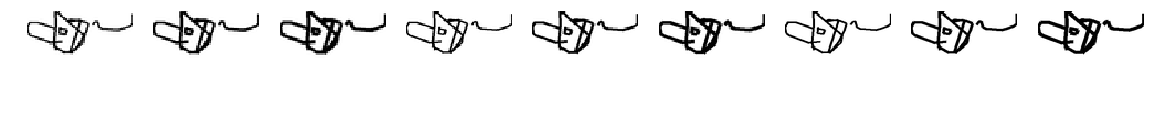

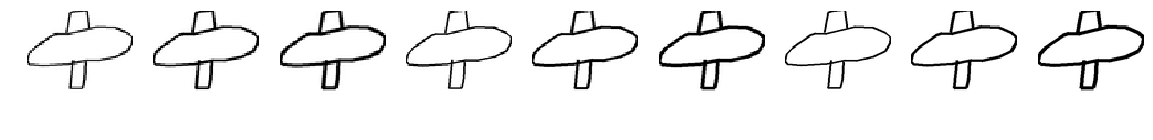

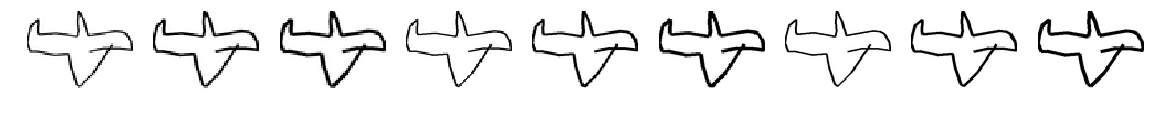

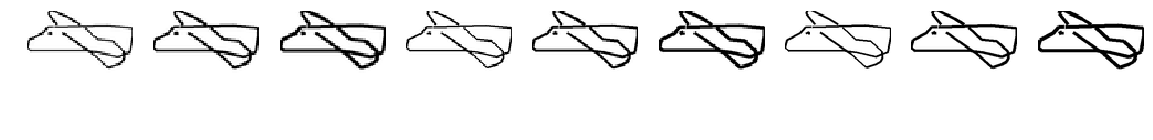

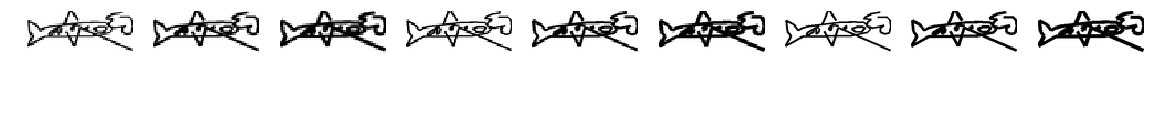

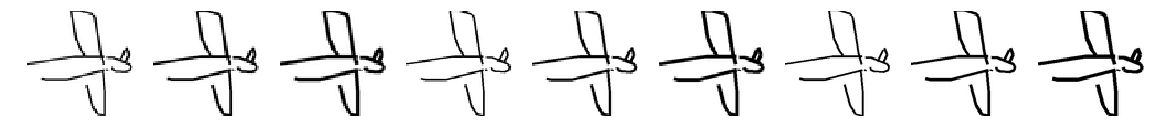

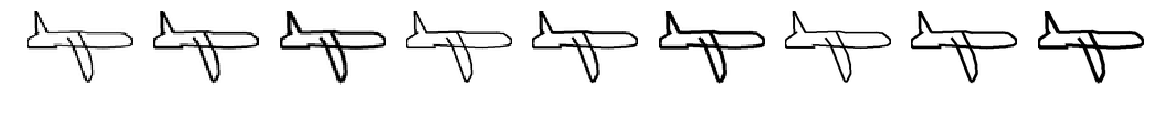

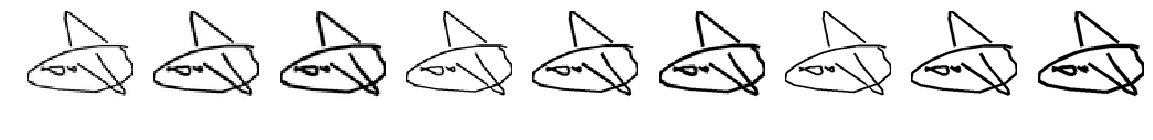

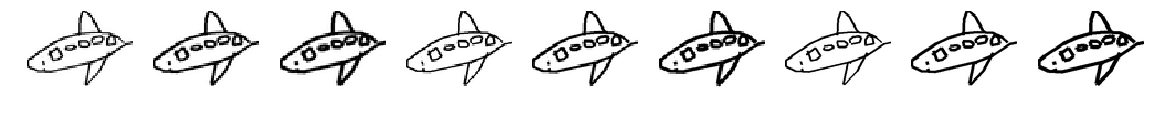

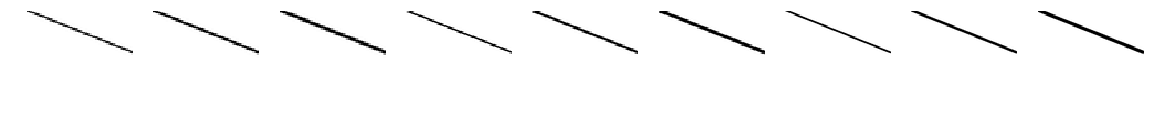

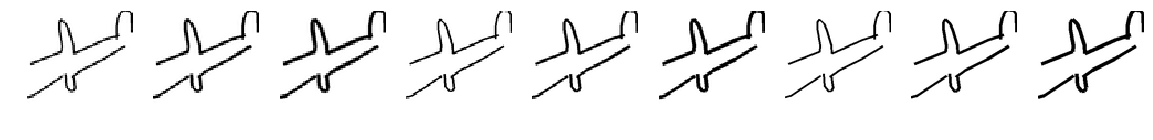

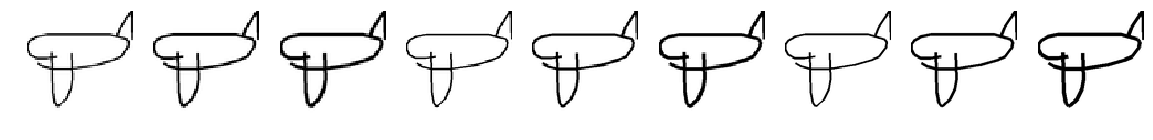

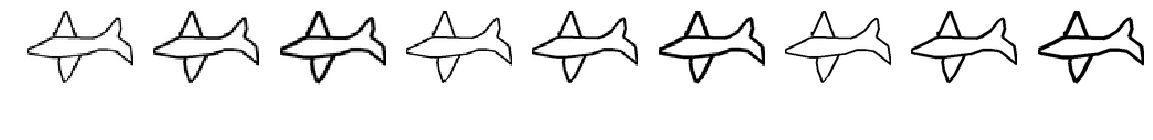

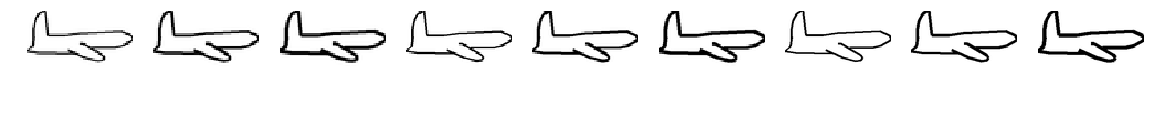

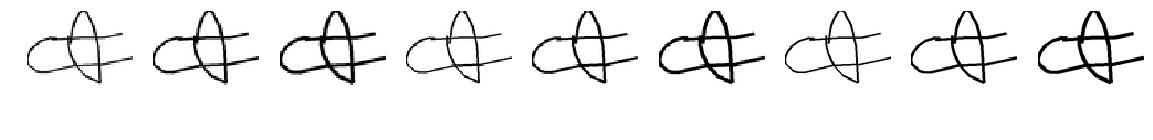

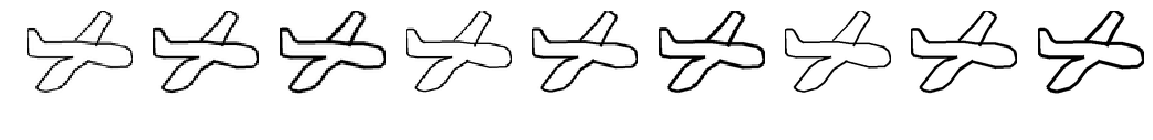

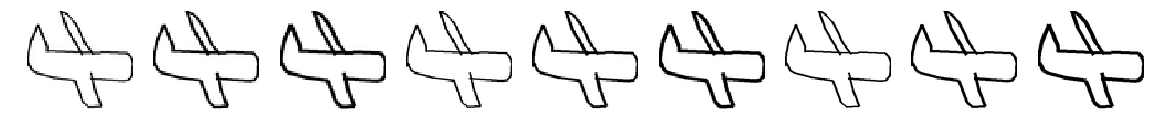

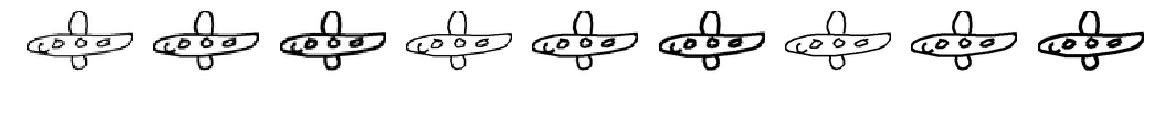

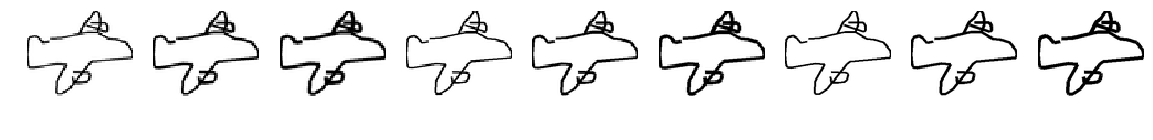

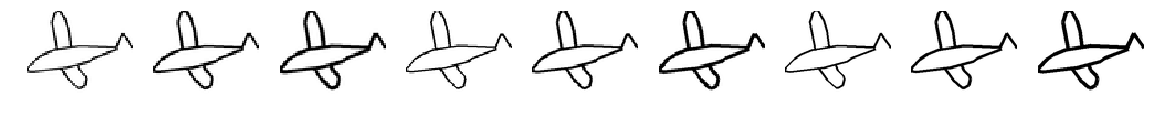

In [26]:
import csv

from quick_draw.tfrecords.converters.bitmap import BitmapConverter
from quick_draw.tfrecords.read_tfrecords import read_bitmaps


with open(project_dir('data/kaggle_simplified/test_csv/test.csv')) as f:
        reader = csv.reader(f)
        next(reader)

        i = 0
        for _, strokes_json, _, _, _, _ in reader:
            images = []
            for size in [64, 80, 96]:
                for width in [5, 7, 9]:
                    bitmap_converter = BitmapConverter(image_size=(size, size), stroke_width=width)
                    image = bitmap_converter.convert(json.loads(strokes_json))
                    images.append(image)
                    
            plot_images(images, columns=9)
